In [7]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from six import StringIO
import pydotplus
from IPython.display import Image
import graphviz

In [8]:
df = pd.read_csv('data/data5000.csv')

In [9]:
le_money = LabelEncoder()
le_platform = LabelEncoder()
le_money.fit(df['money'])
le_platform.fit(df['platform'])
df['money'] = le_money.transform(df['money'])
df['platform'] = le_platform.transform(df['platform'])
print(df)

      enjoyAmerican  enjoyKorean  enjoyJapan  enjoyChinese  money  platform
0          0.861131     0.221803    0.852854      0.396622    675         0
1          0.226051     0.838975    0.887900      0.879926    466         1
2          0.845575     0.684036    0.637755      0.623828     20         0
3          0.522301     0.008177    0.045165      0.003219    664         0
4          0.249466     0.882763    0.298830      0.496570    580         2
...             ...          ...         ...           ...    ...       ...
4995       0.818098     0.823436    0.194627      0.848794    193         1
4996       0.438422     0.277663    0.458380      0.797708    440         1
4997       0.060673     0.079598    0.624072      0.775792    978         2
4998       0.857583     0.430497    0.966068      0.614779   1190         1
4999       0.390177     0.118798    0.293989      0.701448    435         1

[5000 rows x 6 columns]


In [10]:
train = df.loc[:3800]
test = df.loc[3801:]

train_x = train.loc[:, ['enjoyAmerican', 'enjoyKorean', 'enjoyJapan', 'enjoyChinese', 'money']]
train_y = train.loc[:, ['platform']]

test_x = test.loc[:, ['enjoyAmerican', 'enjoyKorean', 'enjoyJapan', 'enjoyChinese', 'money']]
test_y = test.loc[:, ['platform']]

clf = DecisionTreeClassifier()
clf.fit(train_x,train_y)

DecisionTreeClassifier()

In [11]:
accuracy_score(clf.predict(test_x), test_y)

0.9291075896580484

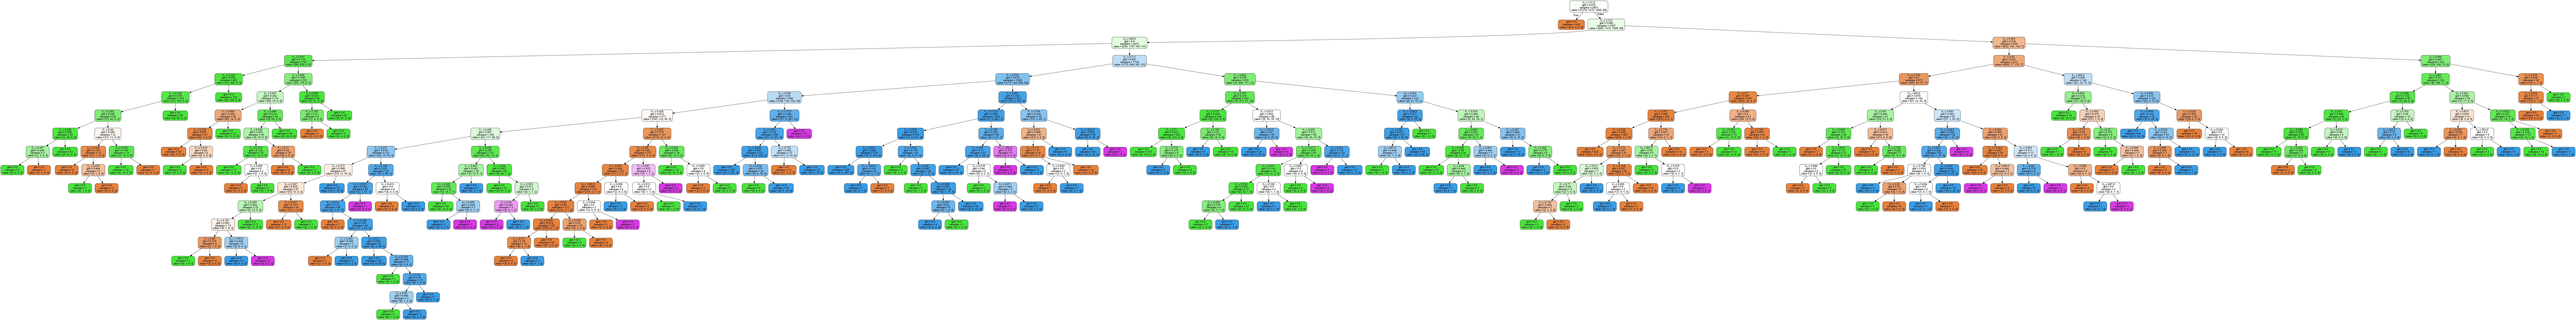

In [13]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#graph = graphviz.Graph(format='png') 